In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('BigMarttrain.csv')

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## EDA

In [4]:
#Checking for duplicate rows
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


<AxesSubplot:>

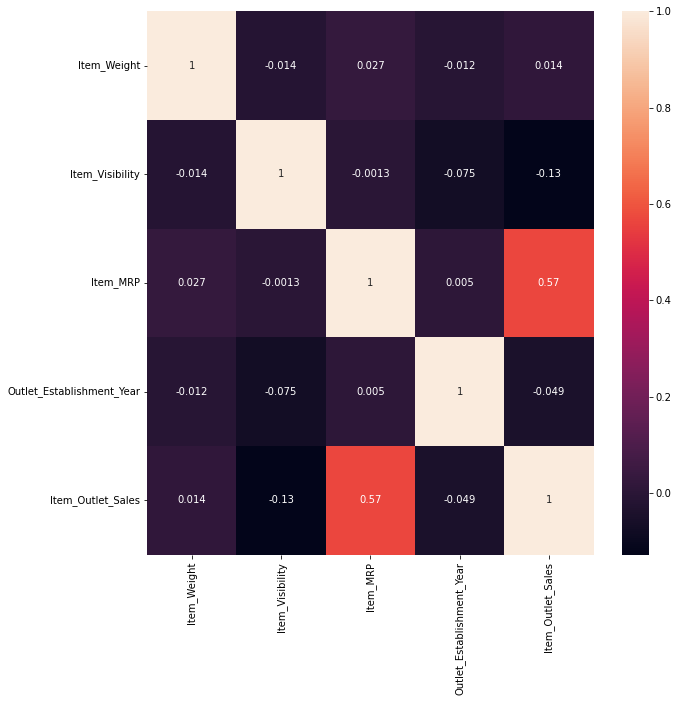

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

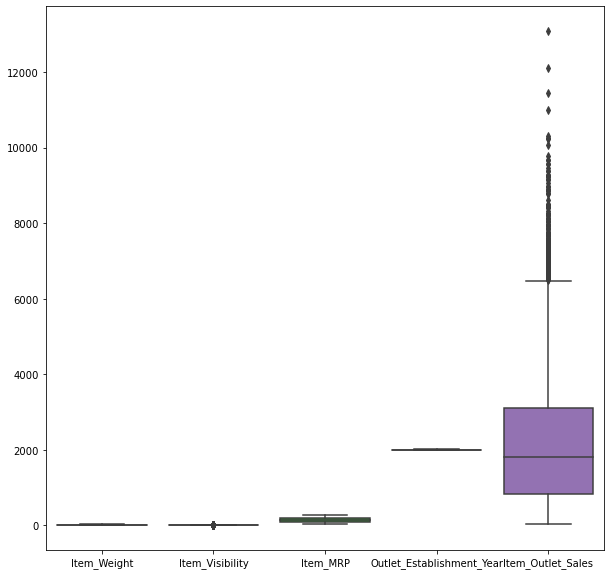

In [9]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)

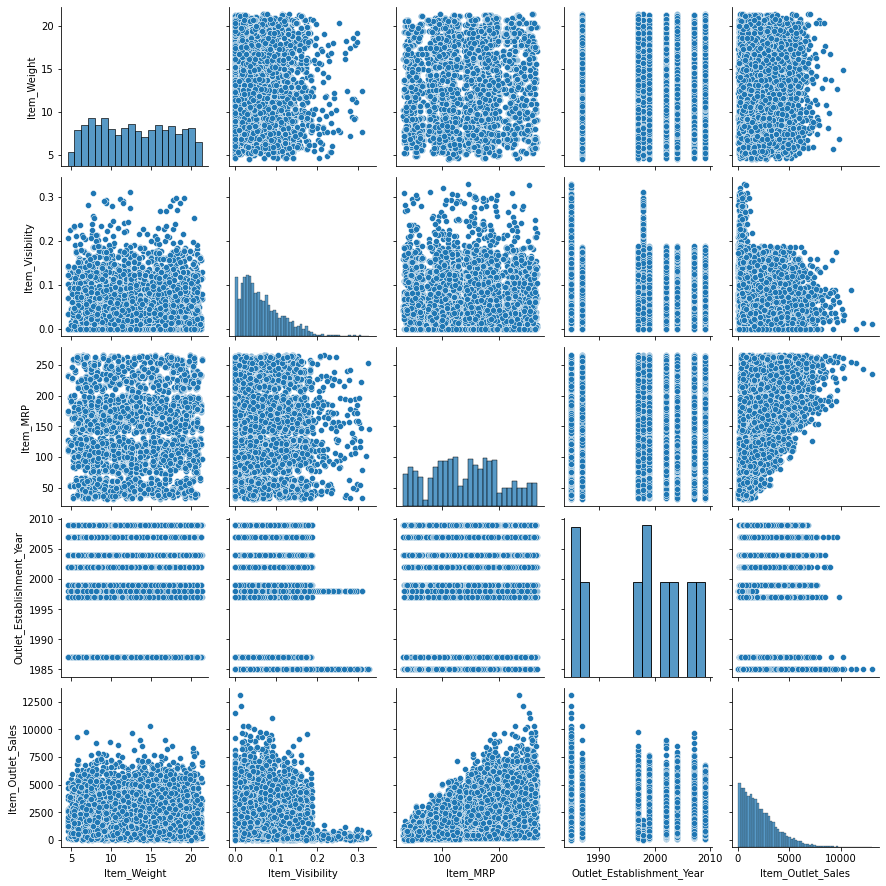

In [10]:
sns.pairplot(data=df)

<AxesSubplot:>

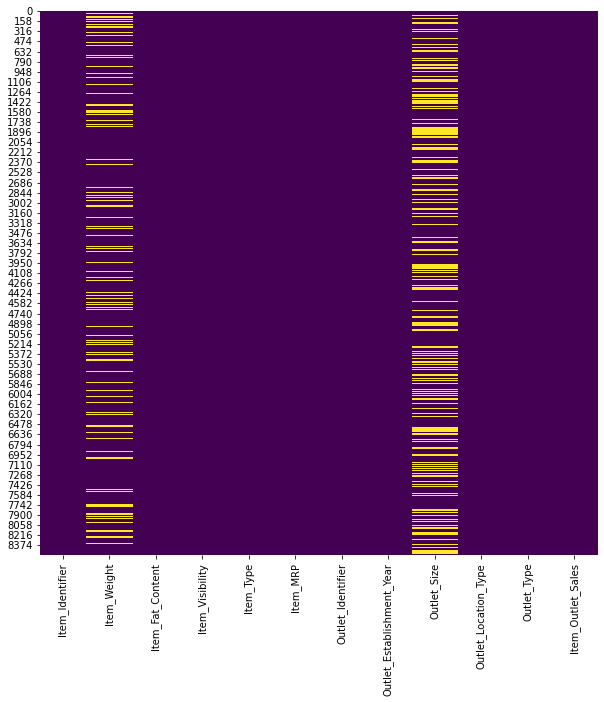

In [11]:
#visualising the missing data
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',fmt='.1g')

## Preprocessing

In [12]:
df.drop('Item_Identifier',axis=1,inplace=True)

In [13]:
num_col=[i for i in df.columns[:-1] if df[i].dtypes!='O']
cat_col=[i for i in df.columns if df[i].dtypes=='O']

In [14]:
num_col

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [15]:
#Checking unique values in categorical features

for i in cat_col:
    unique=df[i].unique()
    print(f'{i} have {len(unique)} values')

Item_Fat_Content have 5 values
Item_Type have 16 values
Outlet_Identifier have 10 values
Outlet_Size have 4 values
Outlet_Location_Type have 3 values
Outlet_Type have 4 values


In [16]:
#checking for the missing value in cat_col
df[cat_col].isnull().sum()

Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [17]:
#Handling missing values in Object columns
for i in cat_col:
    mode_val=df[i].mode()[0]
    df[i].fillna(mode_val,inplace=True)

Item_Weight                     AxesSubplot(0.125,0.125;0.168478x0.755)
Item_Visibility              AxesSubplot(0.327174,0.125;0.168478x0.755)
Item_MRP                     AxesSubplot(0.529348,0.125;0.168478x0.755)
Outlet_Establishment_Year    AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

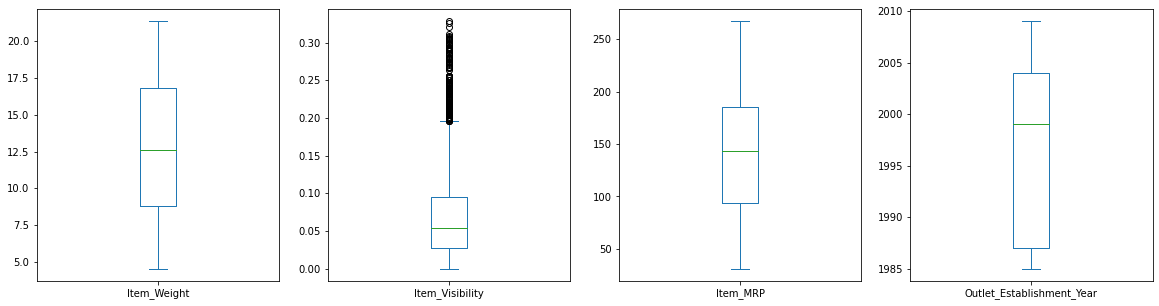

In [18]:
df[df.columns[:-1]].plot(kind='box',subplots=True,figsize=(20,5))

In [19]:
df[num_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Establishment_Year  8523 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 266.5 KB


In [20]:
#fixing outlier in num_col

#float
for i in num_col[:-1]:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    IQR=q3-q1
    lower_limit=q1-(IQR*1.5)
    higher_limit=q3+(IQR*1.5)
    df.loc[df[i]<lower_limit,i]=lower_limit
    df.loc[df[i]>higher_limit,i]=higher_limit
    


In [21]:
df[num_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Establishment_Year  8523 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 266.5 KB


In [22]:
#Fixing the null values in num_col

df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)



Item_Weight                     AxesSubplot(0.125,0.125;0.168478x0.755)
Item_Visibility              AxesSubplot(0.327174,0.125;0.168478x0.755)
Item_MRP                     AxesSubplot(0.529348,0.125;0.168478x0.755)
Outlet_Establishment_Year    AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

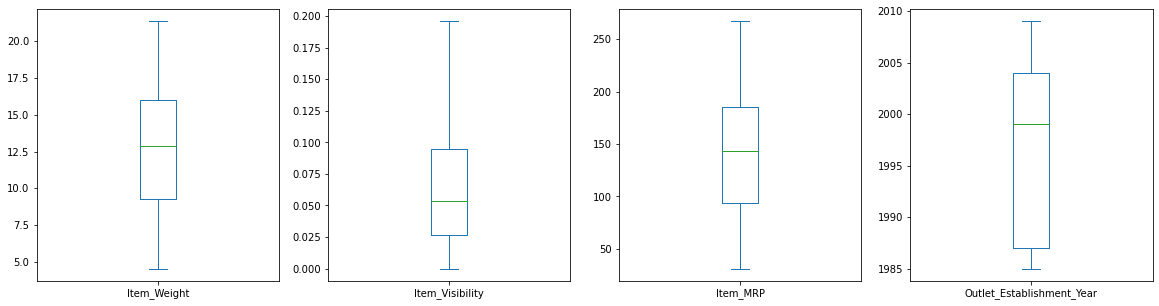

In [23]:
df[df.columns[:-1]].plot(kind='box',subplots=True,figsize=(20,5))

In [24]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [25]:
df['Item_Fat_Content'].replace({'low fat':'Low Fat',
                                'LF':'Low Fat',
                               'reg':'Regular'},inplace=True)

In [26]:
'''
replace:Item_Fat_Content,Outlet_Size, Outlet_Location_Type
get_dummies:Item_Type,Outlet_Identifier,Outlet_Type
'''
#

'\nreplace:Item_Fat_Content,Outlet_Size, Outlet_Location_Type\nget_dummies:Item_Type,Outlet_Identifier,Outlet_Type\n'

In [27]:
replace_col=['Item_Fat_Content','Outlet_Size', 'Outlet_Location_Type']
dummy_col=['Item_Type','Outlet_Identifier','Outlet_Type']



In [28]:
#Checking unique values in categorical features

for i in replace_col:
    unique=df[i].unique()
    print(f'{i}: {unique}')

Item_Fat_Content: ['Low Fat' 'Regular']
Outlet_Size: ['Medium' 'High' 'Small']
Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']


In [29]:
df['Item_Fat_Content'].replace({'Low Fat':1,'Regular':2},inplace=True)
df['Outlet_Size'].replace({'Small':1,'Medium':2,'High':3},inplace=True)
df['Outlet_Location_Type'].replace({'Tier 1':1,'Tier 2':2,'Tier 3':3},inplace=True)

In [30]:
new_df=pd.get_dummies(data=df,columns=dummy_col)
new_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,1,0.016047,249.8092,1999,2,1,3735.1380,0,0,...,0,0,0,0,0,1,0,1,0,0
1,5.920,2,0.019278,48.2692,2009,2,3,443.4228,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500,1,0.016760,141.6180,1999,2,1,2097.2700,0,0,...,0,0,0,0,0,1,0,1,0,0
3,19.200,2,0.000000,182.0950,1998,2,3,732.3800,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.930,1,0.000000,53.8614,1987,3,3,994.7052,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,214.5218,1987,3,3,2778.3834,0,0,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,2,0.046982,108.1570,2002,2,2,549.2850,1,0,...,0,0,0,1,0,0,0,1,0,0
8520,10.600,1,0.035186,85.1224,2004,1,2,1193.1136,0,0,...,0,0,1,0,0,0,0,1,0,0
8521,7.210,2,0.145221,103.1332,2009,2,3,1845.5976,0,0,...,0,0,0,0,0,0,0,0,1,0


In [31]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int64  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Establishment_Year        8523 non-null   int64  
 5   Outlet_Size                      8523 non-null   int64  
 6   Outlet_Location_Type             8523 non-null   int64  
 7   Item_Outlet_Sales                8523 non-null   float64
 8   Item_Type_Baking Goods           8523 non-null   uint8  
 9   Item_Type_Breads                 8523 non-null   uint8  
 10  Item_Type_Breakfast              8523 non-null   uint8  
 11  Item_Type_Canned                 8523 non-null   uint8  
 12  Item_Type_Dairy     

In [32]:
new_num=[i for i in df.columns if df[i].dtypes=='float64']
new_num.remove('Item_Outlet_Sales')
new_num

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [33]:
new_cat_col=[]
for i in new_df.columns:
    if i not in new_num and i!='Item_Outlet_Sales':
        new_cat_col.append(i)

In [34]:
from sklearn.feature_selection import  f_regression

In [35]:
#applying Anova
#We dont need to scale the data

_,p_val = f_regression(new_df[new_cat_col],new_df['Item_Outlet_Sales'])
cat_df=pd.DataFrame({'p_val':p_val,
                    'cat col': new_df[new_cat_col].columns})
cat_df.sort_values('p_val',ascending=True,inplace=True)
cat_df.reset_index(drop=True)


,p_val,cat col
0,0.000000e+00,Outlet_Type_Grocery Store
1,9.498591e-191,Outlet_Type_Supermarket Type3
2,9.498591e-191,Outlet_Identifier_OUT027
3,7.393077e-159,Outlet_Identifier_OUT010
4,3.168062e-150,Outlet_Identifier_OUT019
5,7.526043e-24,Outlet_Type_Supermarket Type1
6,1.389024e-16,Outlet_Location_Type
7,1.586578e-15,Outlet_Size
8,1.064696e-06,Outlet_Identifier_OUT035
9,5.673082e-06,Outlet_Establishment_Year


In [36]:
cat_df[(cat_df['p_val']<0.05)]

,p_val,cat col
30,0.000000e+00,Outlet_Type_Grocery Store
33,9.498591e-191,Outlet_Type_Supermarket Type3
25,9.498591e-191,Outlet_Identifier_OUT027
20,7.393077e-159,Outlet_Identifier_OUT010
24,3.168062e-150,Outlet_Identifier_OUT019
31,7.526043e-24,Outlet_Type_Supermarket Type1
3,1.389024e-16,Outlet_Location_Type
2,1.586578e-15,Outlet_Size
26,1.064696e-06,Outlet_Identifier_OUT035
1,5.673082e-06,Outlet_Establishment_Year


In [37]:
selected_cal_col=cat_df[(cat_df['p_val']<0.05)]['cat col'].tolist()
selected_cal_col

['Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type3',
 'Outlet_Identifier_OUT027',
 'Outlet_Identifier_OUT010',
 'Outlet_Identifier_OUT019',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Identifier_OUT035',
 'Outlet_Establishment_Year',
 'Item_Type_Baking Goods',
 'Outlet_Type_Supermarket Type2',
 'Outlet_Identifier_OUT018',
 'Outlet_Identifier_OUT049',
 'Outlet_Identifier_OUT017',
 'Item_Type_Fruits and Vegetables',
 'Item_Type_Health and Hygiene',
 'Outlet_Identifier_OUT013',
 'Item_Type_Soft Drinks',
 'Item_Type_Snack Foods',
 'Item_Type_Others']

In [38]:
new_num.append('Item_Outlet_Sales')

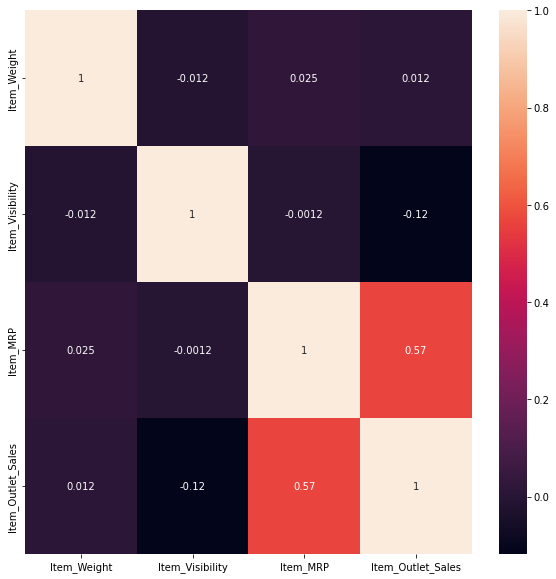

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(new_df[new_num].corr(),annot=True);

In [40]:
new_num

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

In [41]:
new_num=['Item_Visibility', 'Item_MRP']

In [42]:
final_df=pd.concat([new_df[new_num],new_df[selected_cal_col],df['Item_Outlet_Sales']],axis=1)
final_df

,Item_Visibility,Item_MRP,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3,Outlet_Identifier_OUT027,Outlet_Identifier_OUT010,Outlet_Identifier_OUT019,Outlet_Type_Supermarket Type1,Outlet_Location_Type,Outlet_Size,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT049,Outlet_Identifier_OUT017,Item_Type_Fruits and Vegetables,Item_Type_Health and Hygiene,Outlet_Identifier_OUT013,Item_Type_Soft Drinks,Item_Type_Snack Foods,Item_Type_Others,Item_Outlet_Sales
0,0.016047,249.8092,0,0,0,0,0,1,1,2,...,0,1,0,0,0,0,0,0,0,3735.1380
1,0.019278,48.2692,0,0,0,0,0,0,3,2,...,1,0,0,0,0,0,1,0,0,443.4228
2,0.016760,141.6180,0,0,0,0,0,1,1,2,...,0,1,0,0,0,0,0,0,0,2097.2700
3,0.000000,182.0950,1,0,0,1,0,0,3,2,...,0,0,0,1,0,0,0,0,0,732.3800
4,0.000000,53.8614,0,0,0,0,0,1,3,3,...,0,0,0,0,0,1,0,0,0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.056783,214.5218,0,0,0,0,0,1,3,3,...,0,0,0,0,0,1,0,1,0,2778.3834
8519,0.046982,108.1570,0,0,0,0,0,1,2,2,...,0,0,0,0,0,0,0,0,0,549.2850
8520,0.035186,85.1224,0,0,0,0,0,1,2,1,...,0,0,0,0,1,0,0,0,0,1193.1136
8521,0.145221,103.1332,0,0,0,0,0,0,3,2,...,1,0,0,0,0,0,0,1,0,1845.5976


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x=final_df.drop('Item_Outlet_Sales',axis=1)
y=final_df['Item_Outlet_Sales']

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_val_score, GridSearchCV

In [47]:
num_folds=10
metric='r2'

pipeline=[]

pipeline.append(('Linear_Regression',Pipeline([('scaled',StandardScaler()),('Linear Regression',LinearRegression())])))
pipeline.append(('Random_Forest',Pipeline([('scaled',StandardScaler()),('Random Forest',RandomForestRegressor())])))             
pipeline.append(('Adaboost',Pipeline([('scaled',StandardScaler()),('Adaboost',AdaBoostRegressor())])))         
pipeline.append(('SVR',Pipeline([('scaled',StandardScaler()),('SVR',SVR())])))         

names=[]
results=[]

for name, model in pipeline:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model,
                                 x_train,
                                 y_train,
                                 cv=kfold,
                                 scoring=metric)
    results.append(cv_results.mean())
    names.append(name)
    
    print(f'{name} is giving {metric} score of {cv_results.mean()}, with standard deviation of: {cv_results.std()}')
    print('-'*10)


Linear_Regression is giving r2 score of 0.5556853172806209, with standard deviation of: 0.024666825651143535
----------
Random_Forest is giving r2 score of 0.5469264967753046, with standard deviation of: 0.0378545772149084
----------
Adaboost is giving r2 score of 0.4791109617518042, with standard deviation of: 0.06149525739841305
----------
SVR is giving r2 score of 0.03290229429683814, with standard deviation of: 0.009929778586066577
----------


In [48]:
#creating result_df for the visualisation
result_df=pd.DataFrame({'Result':results,
                       'Name':names})

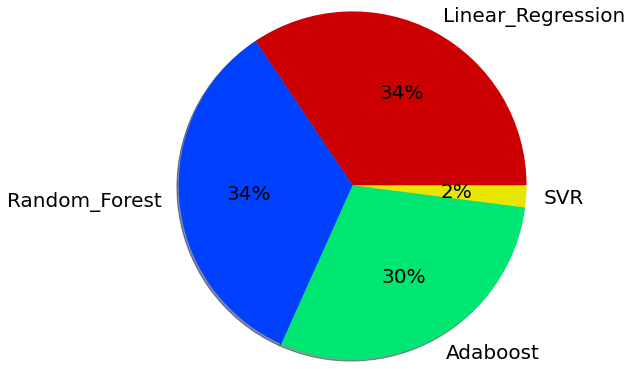

In [49]:
color_li=['#cc0000','#0040ff','#00e673','#e6e600']
plt.pie(data=result_df,x='Result',radius=2,colors=color_li,shadow=True,labels='Name',textprops={'fontsize':20},autopct='%.0f%%');

In [50]:
model_linear=Pipeline([('scaled',StandardScaler()),('LR',LinearRegression())])
tuning_param={
    'LR__fit_intercept':[True,False],
    'LR__copy_X':[True,False],
    'LR__positive':[True,False]
}
kfold = KFold(n_splits=num_folds)

grid = GridSearchCV(estimator=model_linear,
                    param_grid=tuning_param,
                    scoring=metric,
                    cv=kfold)
grid_result = grid.fit(x_train, y_train)
print(f'{grid_result.best_score_},{grid_result.best_params_}')


0.5562973890000251,{'LR__copy_X': True, 'LR__fit_intercept': True, 'LR__positive': True}


In [ ]:

model_RandomForest = Pipeline([('Scaled',StandardScaler()),('RF', RandomForestRegressor())])

tuned_parameters = {
    'RF__n_estimators':[100,80,110],    
    'RF__criterion':['squared_error', 'absolute_error', 'poisson'],
    'RF__max_depth':[3,5,10,15],
    'RF__max_features':['sqrt', 'log2', None]
    
    }
kfold = KFold(n_splits=num_folds)

grid = GridSearchCV(estimator=model_RandomForest,
                    param_grid=tuned_parameters,
                    scoring=metric,
                    cv=kfold)
grid_result = grid.fit(x_train, y_train)
print(f'{grid_result.best_score_},{grid_result.best_params_}')


## Finalising Algorithm and Model building

In [ ]:
model_linear=Pipeline([('scaled',StandardScaler()),('LR',LinearRegression(copy_X= True, 
                                                                          fit_intercept= True,
                                                                          positive= True))])


In [ ]:
model_linear.fit(x_train,y_train)


In [ ]:
y_pred=model_linear.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)